In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib notebook

In [2]:
import gmag.arrays.carisma as carisma
from gmag import utils
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fl = carisma.list_files('GILL','2012-01-01',ndays=4)
fl.head()

,date,fname,dir,hdir
0,2012-01-01,20120101GILL.F01.gz,D:\data\magnetometer\CARISMA\2012\01\01,http://data.carisma.ca/FGM/1Hz/2012/01/01/
1,2012-01-02,20120102GILL.F01.gz,D:\data\magnetometer\CARISMA\2012\01\02,http://data.carisma.ca/FGM/1Hz/2012/01/02/
2,2012-01-03,20120103GILL.F01.gz,D:\data\magnetometer\CARISMA\2012\01\03,http://data.carisma.ca/FGM/1Hz/2012/01/03/
3,2012-01-04,20120104GILL.F01.gz,D:\data\magnetometer\CARISMA\2012\01\04,http://data.carisma.ca/FGM/1Hz/2012/01/04/


In [4]:
#test download
carisma.download('GILL','2021-02-09',ndays=1)

File 20210209GILL.F01.gz exists use force=True to download


In [5]:
#test load data
df, df2=carisma.load(['ISLL','GILL'],'2019-01-04',ndays=1,drop_flag=False)

File 20190104ISLL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2019\01\04\20190104ISLL.F01.gz
File 20190104GILL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2019\01\04\20190104GILL.F01.gz


In [6]:
df.head()
df.tail()

,ISLL_X,ISLL_Y,ISLL_Z,ISLL_flag,GILL_X,GILL_Y,GILL_Z,GILL_flag,ISLL_H,ISLL_D,GILL_H,GILL_D
t,,,,,,,,,,,,
2019-01-04 00:00:00,12098.819,52.047,57679.853,.,11474.709,-373.669,58241.237,.,12098.795448,57.260800,11478.297248,-239.306193
2019-01-04 00:00:01,12098.841,52.034,57679.850,.,11474.700,-373.672,58241.184,.,12098.817453,57.247810,11478.288283,-239.309298
2019-01-04 00:00:02,12098.844,52.041,57679.831,.,11474.800,-373.600,58241.197,.,12098.820450,57.254811,11478.387433,-239.236132
2019-01-04 00:00:03,12098.844,52.047,57679.825,.,11474.728,-373.703,58241.150,.,12098.820448,57.260811,11478.316644,-239.339968
2019-01-04 00:00:04,12098.847,52.059,57679.819,.,11474.797,-373.637,58241.178,.,12098.823443,57.272812,11478.384867,-239.273164


,ISLL_X,ISLL_Y,ISLL_Z,ISLL_flag,GILL_X,GILL_Y,GILL_Z,GILL_flag,ISLL_H,ISLL_D,GILL_H,GILL_D
t,,,,,,,,,,,,
2019-01-04 23:59:55,12131.241,50.375,57766.859,.,11618.681,-337.794,58263.056,.,12131.218165,55.602772,11621.839383,-201.748136
2019-01-04 23:59:56,12131.231,50.347,57766.862,.,11618.541,-337.919,58262.922,.,12131.208177,55.574768,11621.700856,-201.874766
2019-01-04 23:59:57,12131.238,50.344,57766.872,.,11618.328,-338.053,58262.828,.,12131.215179,55.571771,11621.489440,-202.011251
2019-01-04 23:59:58,12131.238,50.306,57766.856,.,11618.197,-338.225,58262.759,.,12131.215195,55.533771,11621.360462,-202.184773
2019-01-04 23:59:59,12131.237,50.294,57766.859,.,11617.938,-338.469,58262.691,.,12131.214200,55.521770,11621.104337,-202.431788


In [7]:
df2

,array,code,name,latitude,longitude,cgm_latitude,cgm_longitude,declination,lshell,mlt_midnight,mlt_ut,year,Time Resolution,Coordinates,PI,Institution
0,CARISMA,ISLL,Island Lake,53.856,265.34,63.02717,335.6151,-0.024691,4.860886,6.879090,17.12091,2019,1.0,"Geographic North - X, Eas - Y, Vertical Down -...",Ian Mann,University of Alberta
1,CARISMA,GILL,Gillam,56.376,265.36,65.40524,335.3998,-0.670791,5.772988,6.893449,17.10655,2019,1.0,"Geographic North - X, Eas - Y, Vertical Down -...",Ian Mann,University of Alberta


In [ ]:
res = (pd.Series(df.index[1:]) -
               pd.Series(df.index[:-1])).value_counts()
res = res.index[0].total_seconds()
res

In [8]:
df, df2=carisma.load(['RABB','FSMI','MCMU','FSIM'],'2005-07-17',ndays=1,drop_flag=False)

File 20050717RABB.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717RABB.F01.gz
File 20050717FSMI.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717FSMI.F01.gz
File 20050717MCMU.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717MCMU.F01.gz
File 20050717FSIM.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717FSIM.F01.gz


In [9]:
df.head()

,RABB_X,RABB_Y,RABB_Z,RABB_flag,FSMI_X,FSMI_Y,FSMI_Z,FSMI_flag,MCMU_X,MCMU_Y,...,FSIM_Z,FSIM_flag,RABB_H,RABB_D,FSMI_H,FSMI_D,MCMU_H,MCMU_D,FSIM_H,FSIM_D
t,,,,,,,,,,,,,,,,,,,,,
2005-07-17 00:00:00,10906.466,1647.028,58986.072,.,10305.559,2599.803,58320.150,.,11911.087,3423.316,...,58550.369,.,11023.791204,-373.803876,10602.143026,-747.050998,12392.962710,-86.955333,10581.339033,75.869429
2005-07-17 00:00:01,10906.288,1646.906,58986.000,.,10305.628,2599.819,58320.119,.,11911.044,3423.247,...,58550.437,.,11023.593906,-373.891293,10602.213573,-747.057337,12392.901943,-87.009346,10581.151517,75.814996
2005-07-17 00:00:02,10906.081,1646.719,58985.925,.,10305.547,2599.716,58319.950,.,11911.022,3423.188,...,58550.500,.,11023.356219,-374.037316,10602.104468,-747.129905,12392.864147,-87.059709,10580.969503,75.740694
2005-07-17 00:00:03,10905.922,1646.562,58985.872,.,10305.559,2599.700,58319.881,.,11910.969,3423.091,...,58550.587,.,11023.171206,-374.162616,10602.110874,-747.148851,12392.785866,-87.137748,10580.805583,75.662846
2005-07-17 00:00:04,10905.781,1646.428,58985.775,.,10305.566,2599.703,58319.791,.,11910.931,3423.016,...,58550.650,.,11023.008092,-374.268592,10602.118461,-747.148186,12392.728197,-87.198930,10580.627860,75.600857


In [10]:
comp='H'

p_col = [col for col in df.columns if col[-1] == comp]
p_col

['RABB_H', 'FSMI_H', 'MCMU_H', 'FSIM_H']

In [11]:
a =df["2005-07-17 07:00:00":"2005-07-17 07:30:00"][p_col].describe()
a

,RABB_H,FSMI_H,MCMU_H,FSIM_H
count,1801.000000,1801.000000,1801.000000,1801.000000
mean,10980.298308,10583.078313,12377.964359,10560.247338
std,33.899967,27.868582,30.491371,32.982603
min,10891.187226,10506.159592,12311.172440,10481.505064
25%,10958.859562,10576.374551,12355.684256,10539.616955
50%,10973.640765,10583.946997,12373.468769,10560.936582
75%,11018.158494,10607.068763,12410.273918,10591.848699
max,11025.195670,10618.948816,12421.327526,10608.657973


<IPython.core.display.Javascript object>


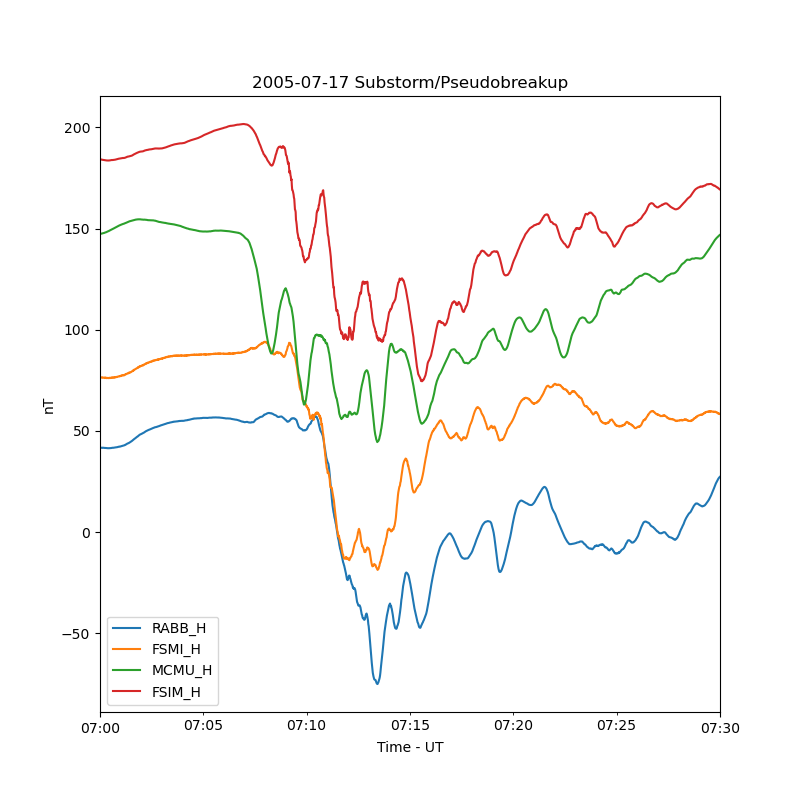

<AxesSubplot:title={'center':'2005-07-17 Substorm/Pseudobreakup'}, xlabel='Time - UT', ylabel='nT'>

In [13]:
#fig, axs = plt.subplots(figsize=(8, 8))
df["2005-07-17 07:00:00":"2005-07-17 07:30:00"][p_col].subtract(df[p_col].mean()).add([0,40,80,120]).plot(ylabel='nT', xlabel='Time - UT',
                                                            figsize=[8,8],title='2005-07-17 Substorm/Pseudobreakup')
#axs.set_ylabel('nT')

In [ ]:
# Read in all Carisma Data for a particular day
from gmag import utils
car_stn = utils.load_station_coor(param='all',col='array')
car_stn.head()

In [ ]:
stn_cgm = utils.load_station_coor(param='CARISMA',col='array', year=2019)


In [ ]:
stn_dat = stn_cgm[stn_cgm['code'] == 'GILL'].reset_index(drop=True)
dec = float(stn_dat['declination'])

In [ ]:
stn_dat

In [ ]:
geo_stn = utils.load_station_geo(param='all',col='code')
geo_stn

In [ ]:
df=carisma.load(list(car_stn['code']),'2020-01-02',edate='2020-01-05',dl=True)

In [ ]:
stn_dat = geo_stn[geo_stn['code'] == ['GILL','ISLL']]
stn_dat

In [ ]:
col=car_stn.columns


In [ ]:
meta = pd.DataFrame(columns=['array', 'code', 'name', 'latitude', 'longitude', 'cgm_latitude',
       'cgm_longitude', 'declination', 'lshell', 'mlt_midnight', 'mlt_ut',
       'year'])

In [ ]:
meta = pd.concat([meta,geo_stn],axis=0, sort=False)
meta

In [ ]:
plt.plot(df['FCHU_X'])